In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [85]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Filling the missing values

In [86]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [87]:
zero_counts = (df == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [88]:

from scipy.stats import skew

# Calculate skewness for each column
skewness = df.apply(skew)

# Identify skewed columns
skewed_columns = skewness[skewness.abs() > 0.7].index

# Print the skewed columns
print("Skewed columns:")
print(skewed_columns)


Skewed columns:
Index(['Pregnancies', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction',
       'Age'],
      dtype='object')


In [89]:
df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].median())  
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())  
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())             
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


In [90]:
zero_counts = (df == 0).sum()
print(zero_counts)

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [91]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

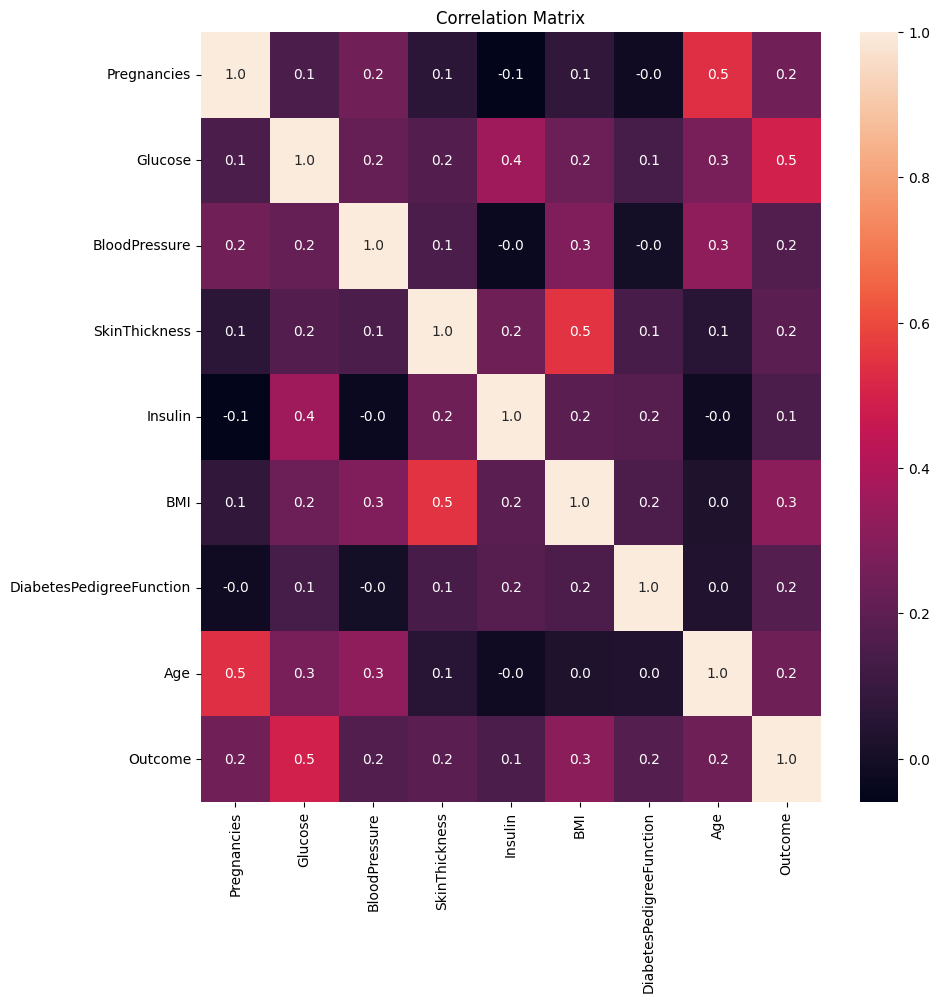

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.title('Correlation Matrix')

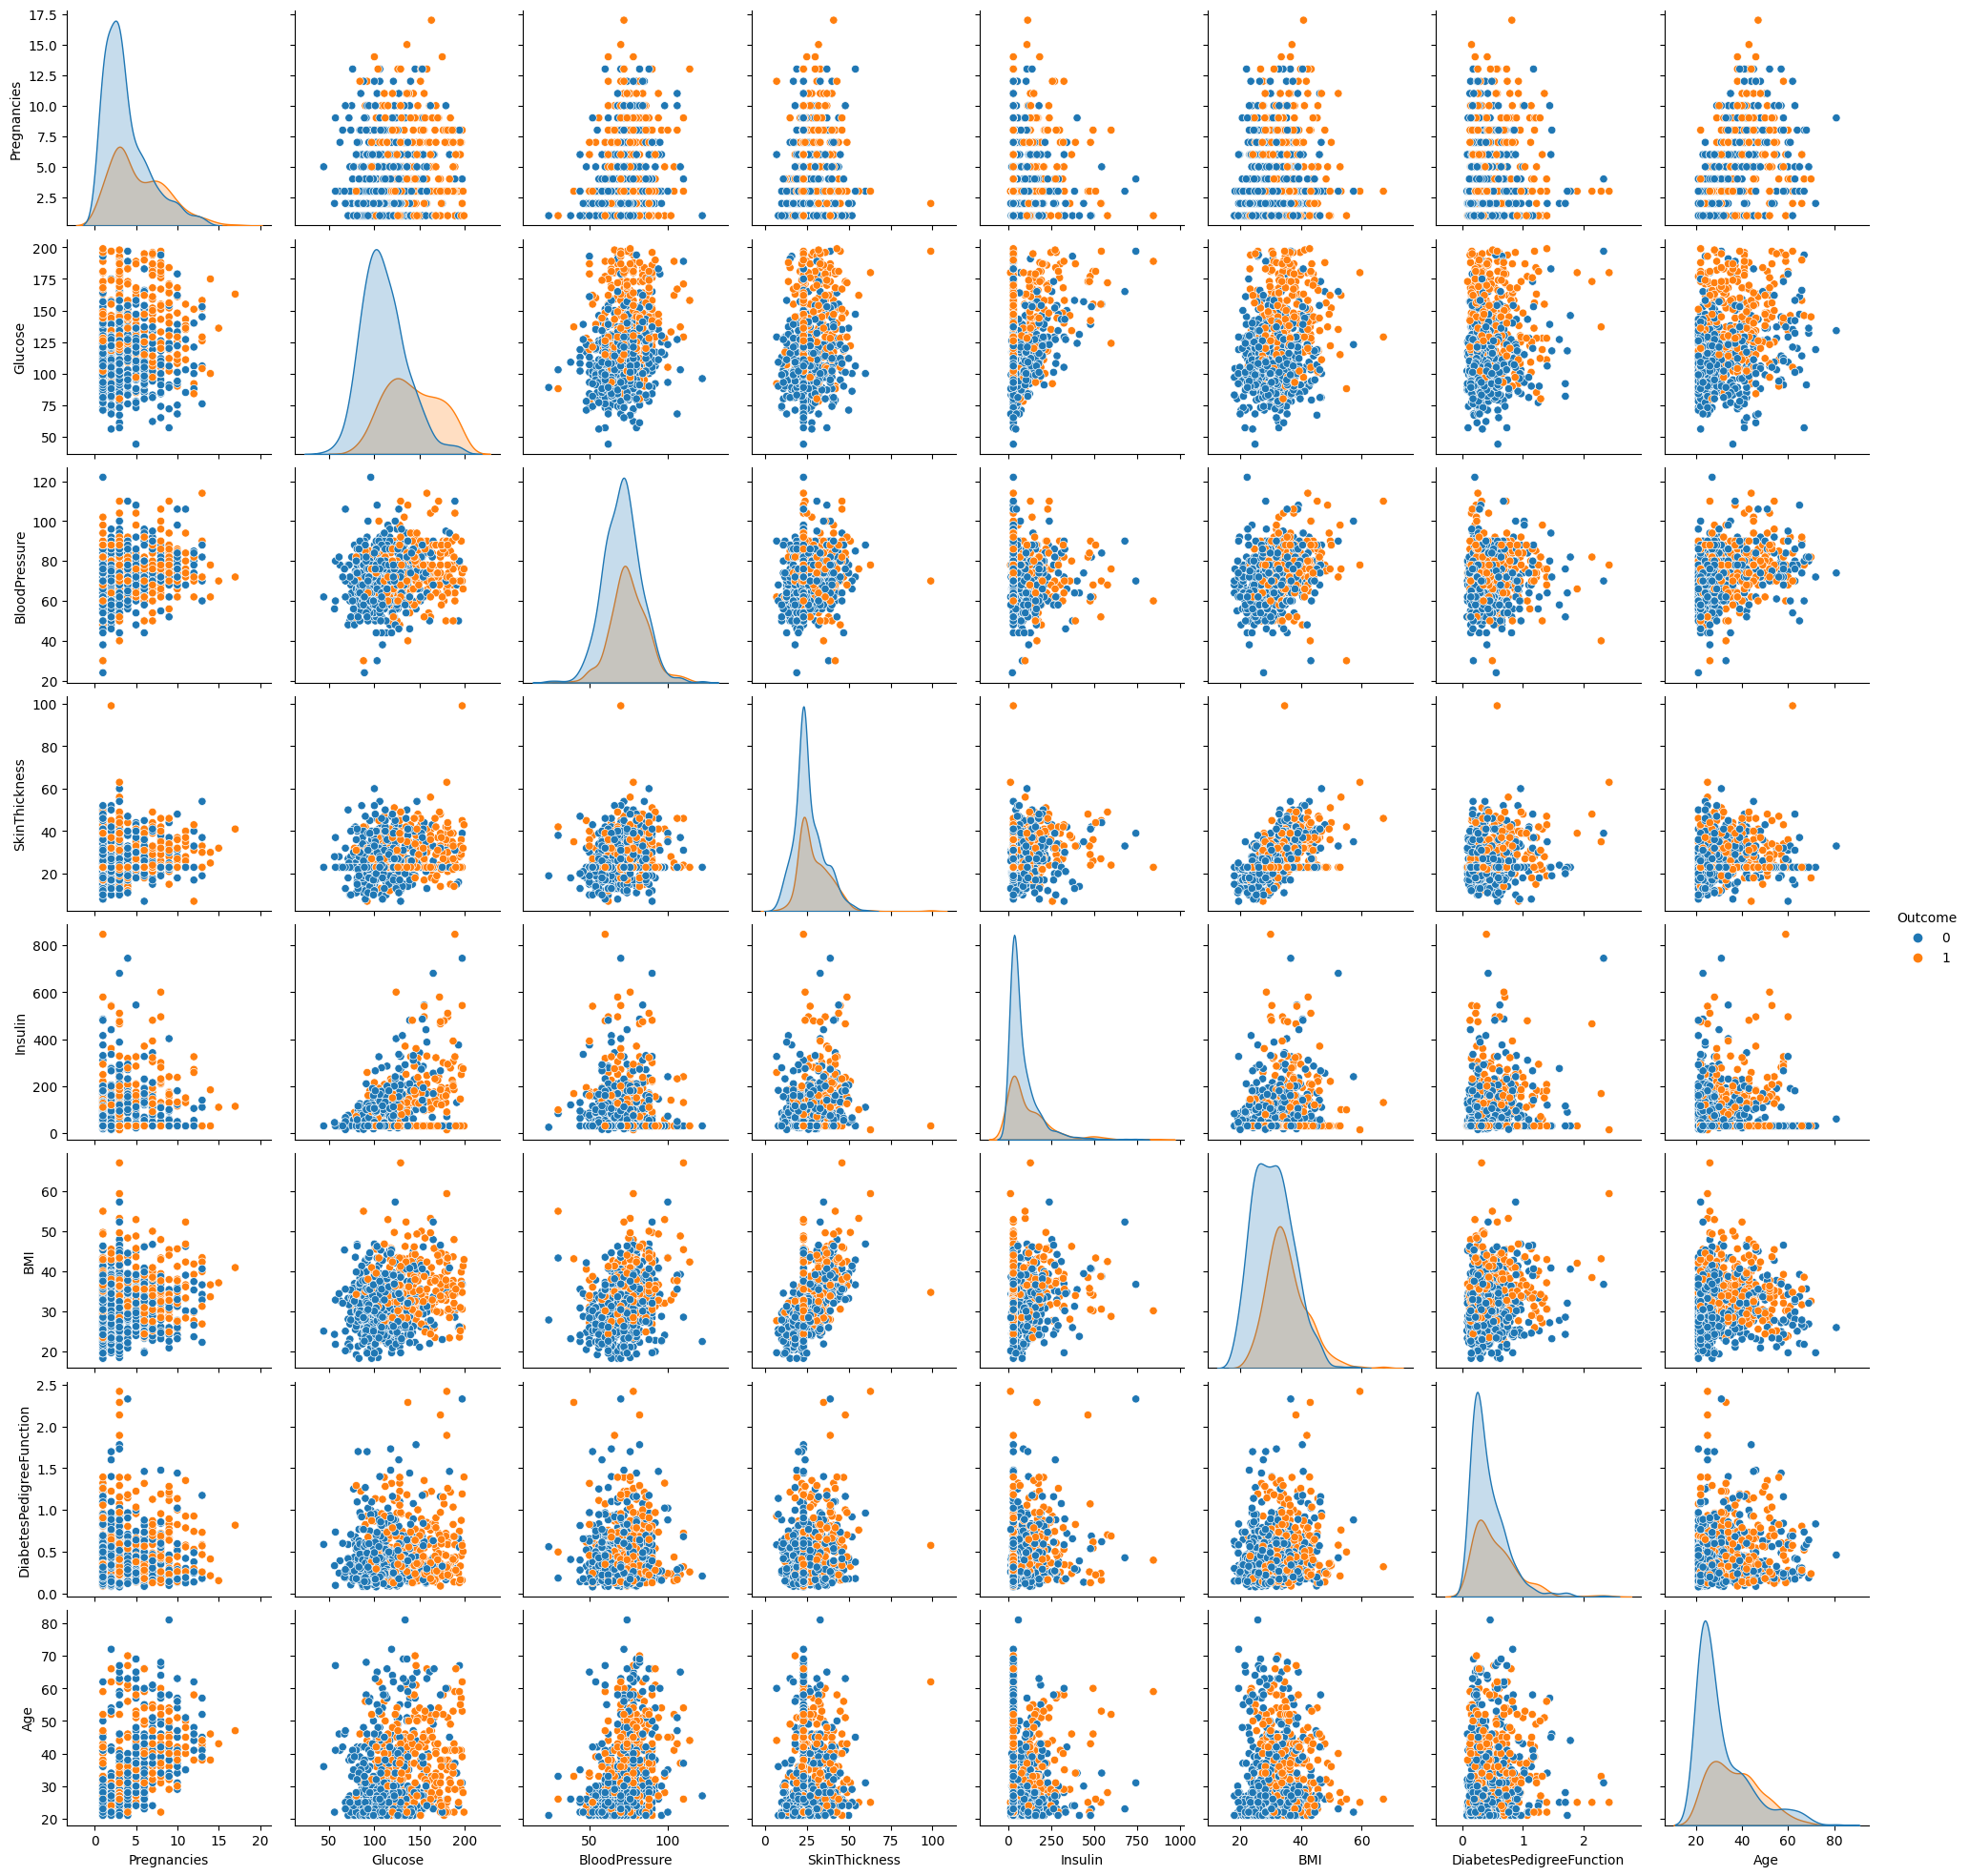

In [93]:
sns.pairplot(df, hue='Outcome')

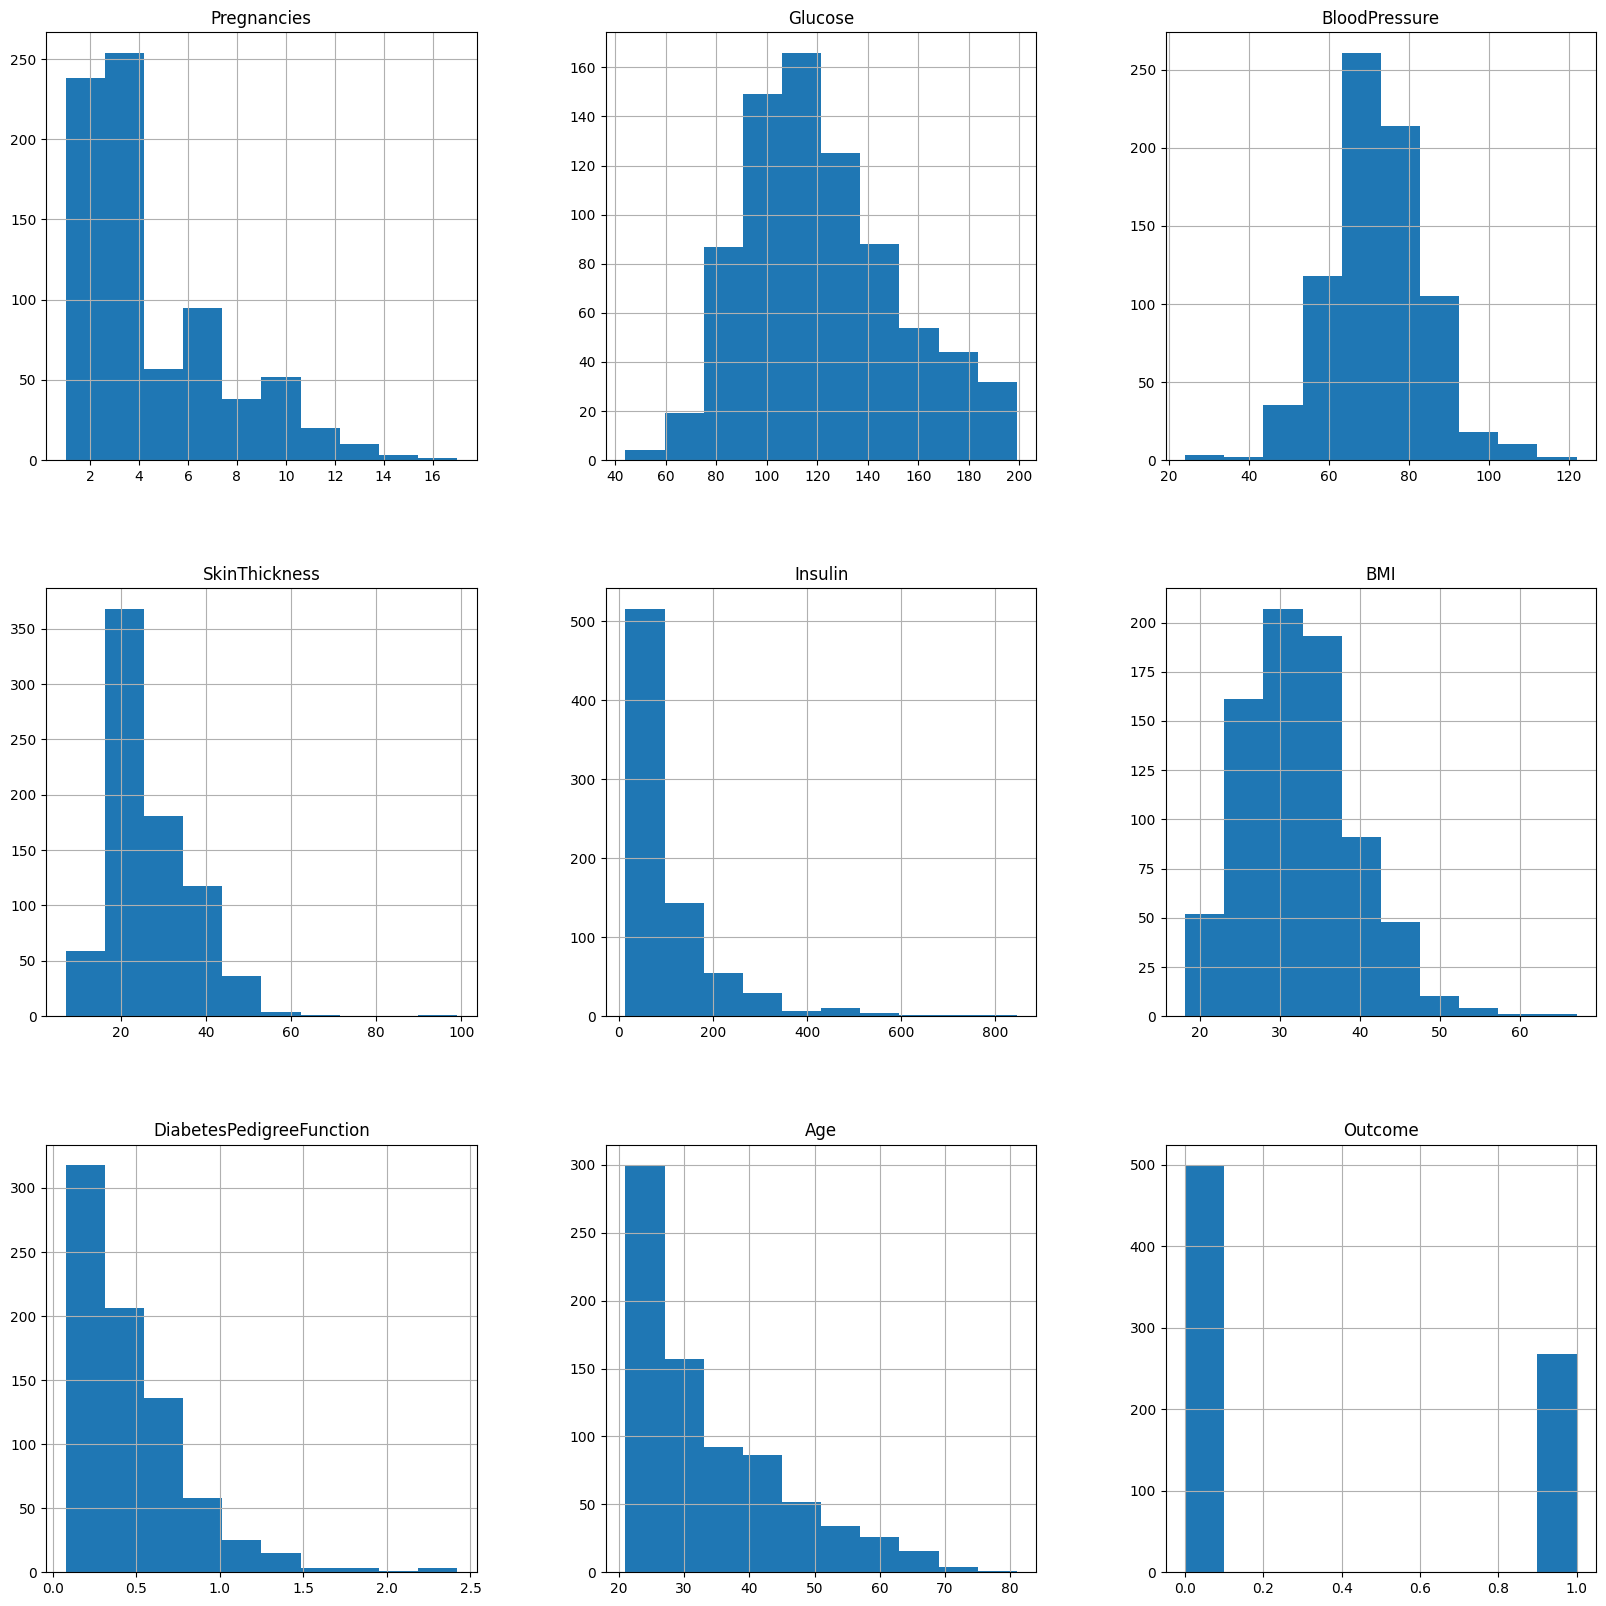

In [94]:
p = df.hist(figsize = (20,20))

0    500
1    268
Name: Outcome, dtype: int64


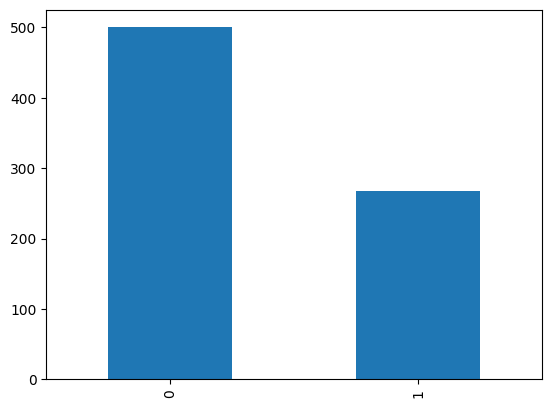

In [95]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

# Train test Data Split

In [100]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)

# Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [143]:
rf_pred = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, rf_pred)

0.7637795275590551

In [144]:
confusion_matrix(y_test, rf_pred)

array([[133,  29],
       [ 31,  61]], dtype=int64)

In [145]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       162
           1       0.68      0.66      0.67        92

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



# Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
dt_pred = dt_model.predict(X_test)
accuracy_score(y_test, dt_pred)

0.7440944881889764

In [114]:
confusion_matrix(y_test, dt_pred)

array([[126,  36],
       [ 29,  63]], dtype=int64)

In [115]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       162
           1       0.64      0.68      0.66        92

    accuracy                           0.74       254
   macro avg       0.72      0.73      0.73       254
weighted avg       0.75      0.74      0.75       254



# Support Vector Machine

In [116]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [117]:
svc_pred = svc_model.predict(X_test)

In [118]:
accuracy_score(y_test, svc_pred)

0.7598425196850394

In [119]:
confusion_matrix(y_test, svc_pred)

array([[148,  14],
       [ 47,  45]], dtype=int64)

In [121]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       162
           1       0.76      0.49      0.60        92

    accuracy                           0.76       254
   macro avg       0.76      0.70      0.71       254
weighted avg       0.76      0.76      0.74       254



# Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
lr_pred = lr_model.predict(X_test)
accuracy_score(y_test, lr_pred)

0.7401574803149606

In [125]:
confusion_matrix(y_test, lr_pred)

array([[130,  32],
       [ 34,  58]], dtype=int64)

In [126]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       162
           1       0.64      0.63      0.64        92

    accuracy                           0.74       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.74      0.74      0.74       254



# K-nearest Neighbor

In [128]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [129]:
knn_pred = knn_model.predict(X_test)
accuracy_score(y_test, knn_pred)

0.7047244094488189

In [130]:
confusion_matrix(y_test, knn_pred)

array([[129,  33],
       [ 42,  50]], dtype=int64)

In [131]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       162
           1       0.60      0.54      0.57        92

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



# Hyperparameter Tuning For Random Forest

In [132]:
from sklearn.model_selection import GridSearchCV

params_rf = {
    'n_estimators': [25,50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3,4,5,6,7,8, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params_rf)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=4, max_leaf_nodes=9, n_estimators=150)


In [133]:
rf_final = RandomForestClassifier(max_depth=4, max_leaf_nodes=9, n_estimators=150)
rf_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_leaf_nodes=9, n_estimators=150)

In [134]:
rf_final_prediction = rf_final.predict(X_test)
accuracy_score(y_test, rf_final_prediction)

0.7244094488188977

# Saving the Model

In [146]:
# Save the model
import pickle
with open('diabetes.pickle', 'wb') as f:
    pickle.dump(rf_model, f)